In [ ]:
# prompt: I want to do k-means clustering on the mnist data set, can you write code for this?

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target

In [ ]:

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform K-Means clustering
n_clusters = 10  # Number of clusters (digits 0-9)
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # n_init increased for better results
kmeans.fit(X_scaled)

KMeans(n_clusters=10, n_init=10, random_state=0)

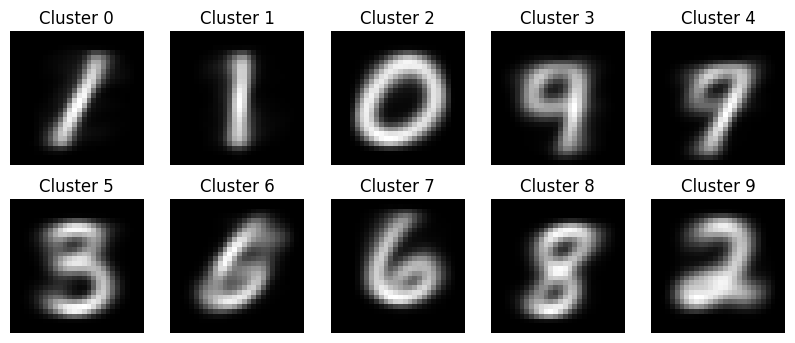

Homogeneity Score: 0.49605304742068473


In [ ]:
# Get cluster labels for each data point
labels = kmeans.labels_

# Visualize some cluster centers (optional)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
  ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
  ax.set_title(f"Cluster {i}")
  ax.axis('off')
plt.show()


# Evaluate the clustering (optional, example using homogeneity score)
from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(y, labels)
print(f"Homogeneity Score: {homogeneity}")

In [ ]:
# prompt: calculate the accuraccy of the model
# Convert string labels to integers
y_int = y.astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_int, labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.21507142857142858


In [ ]:
# prompt: can you sample from X and y so I only use the first 1000 samples

X = X[:30000]
y = y[:30000]

In [ ]:

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
class ConstrainedKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, must_link=None, cannot_link=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.must_link = must_link if must_link else []
        self.cannot_link = cannot_link if cannot_link else []

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        self.labels = np.zeros(X.shape[0], dtype=int)

        for epoch in range(self.max_iter):
            previous_centroids = np.copy(self.centroids)
            self._assign_clusters(X)
            self._update_centroids(X)

            if epoch % 10 == 0:
              print(f'epoch: {epoch}')

            if np.sum(np.abs(previous_centroids - self.centroids)) < self.tol:
                break

    def _initialize_centroids(self, X):
        """Initializes centroids randomly."""
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assigns data points to clusters with constraints."""
        for i, x in enumerate(X):
            closest_centroid = np.argmin(np.linalg.norm(x - self.centroids, axis=1))
            self.labels[i] = self._apply_constraints(i, closest_centroid)

    def _apply_constraints(self, data_index, closest_centroid):
        """Enforces must-link and cannot-link constraints."""
        for a, b in self.must_link:
            if data_index == a and self.labels[b] != closest_centroid:
                return self.labels[b]
            if data_index == b and self.labels[a] != closest_centroid:
                return self.labels[a]

        for a, b in self.cannot_link:
            if data_index == a and self.labels[b] == closest_centroid:
                # Find the second closest centroid
                distances = np.linalg.norm(X[data_index] - self.centroids, axis=1)
                distances[self.labels[b]] = np.inf  # Exclude the cannot-link cluster
                return np.argmin(distances)
            if data_index == b and self.labels[a] == closest_centroid:
                distances = np.linalg.norm(X[data_index] - self.centroids, axis=1)
                distances[self.labels[a]] = np.inf
                return np.argmin(distances)

        return closest_centroid

    def _update_centroids(self, X):
        """Updates cluster centroids."""
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(X[self.labels == i], axis=0)


# # Sample data (replace with your data)
# X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Define constraints
# must_link = [[0, 1]]  # Data point 0 must be in the same cluster as data point 1
# cannot_link = [[2, 4]]  # Data point 2 cannot be in the same cluster as data point 4

# Initialize and fit the constrained k-means model
kmeans = ConstrainedKMeans(n_clusters=10, max_iter = 300, must_link=None, cannot_link=None)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels

epoch: 0
epoch: 10
epoch: 20


In [ ]:
# prompt: calculate the accuraccy of the model
# Convert string labels to integers
y_int = y.astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_int, labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.333


In [ ]:
index_list = [[] for _ in range(10)]
for i in range(len(y)):
  index_list[y_int[i]].append(i)

In [ ]:
for i in range(10):
  print(len(index_list[i]))

2961
3423
2948
3073
2926
2709
2975
3107
2875
3003


In [ ]:
cannot_link = []
for row in index_list:
  for other_row in index_list:
    if row == other_row:
      continue
    cannot_link.append([row[0], other_row[0]])

In [ ]:
nbr_linked = 500
must_link = []
for row in index_list:
  for i in range(nbr_linked):
    must_link.append([row[i], row[i+1]])

In [ ]:
nbr_forced = 864
hard_forced = []
for i in range(10):
  for j in range(nbr_forced):
    hard_forced.append((index_list[i][j], i))

In [ ]:
print(hard_forced)

[(1, 0), (21, 0), (34, 0), (37, 0), (51, 0), (56, 0), (63, 0), (68, 0), (3, 1), (6, 1), (8, 1), (14, 1), (23, 1), (24, 1), (40, 1), (59, 1), (5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (7, 3), (10, 3), (12, 3), (27, 3), (30, 3), (44, 3), (49, 3), (50, 3), (2, 4), (9, 4), (20, 4), (26, 4), (53, 4), (58, 4), (60, 4), (61, 4), (0, 5), (11, 5), (35, 5), (47, 5), (65, 5), (100, 5), (132, 5), (138, 5), (13, 6), (18, 6), (32, 6), (36, 6), (39, 6), (62, 6), (66, 6), (73, 6), (15, 7), (29, 7), (38, 7), (42, 7), (52, 7), (71, 7), (79, 7), (84, 7), (17, 8), (31, 8), (41, 8), (46, 8), (55, 8), (85, 8), (94, 8), (97, 8), (4, 9), (19, 9), (22, 9), (33, 9), (43, 9), (45, 9), (48, 9), (54, 9)]


In [ ]:
class ConstrainedKMeans:
    def __init__(self, X = X, n_clusters = 10, max_iter=300, tol=1e-4, must_link=None, cannot_link=None, hard_forced = None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.must_link = must_link if must_link else []
        self.cannot_link = cannot_link if cannot_link else []
        self.hard_forced = hard_forced if hard_forced else None
        self.forced_indexes = []
        if hard_forced:
          self.labels = np.zeros(X.shape[0], dtype=int)
          self.centroids = np.zeros((n_clusters, X.shape[1]))
          for i, nbr in self.hard_forced:
            self.forced_indexes.append(i)
            self.labels[i] = nbr
            self.centroids[nbr] += X[i]
          self.centroids = self.centroids/(len(hard_forced)/10)
        else:
          self.forced_indexes = []
          self.centroids = self._initialize_centroids(X)
          self.labels = np.zeros(X.shape[0], dtype=int)


    def fit(self, X):
        for epoch in range(self.max_iter):
            previous_centroids = np.copy(self.centroids)
            self._assign_clusters(X)
            self._update_centroids(X)
            if epoch % 10 == 0:
              print(f'epoch: {epoch}')
            if np.sum(np.abs(previous_centroids - self.centroids)) < self.tol:
                break


    def _initialize_centroids(self, X):
        """Initializes centroids randomly."""
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assigns data points to clusters with constraints."""
        for i, x in enumerate(X):
            if i in self.forced_indexes:
              continue
            closest_centroid = np.argmin(np.linalg.norm(x - self.centroids, axis=1))
            self.labels[i] = closest_centroid

    def _apply_constraints(self, data_index, closest_centroid):
        """Enforces must-link and cannot-link constraints."""
        for i, nbr in self.hard_forced:
          if data_index == i:
            return nbr

        return closest_centroid

    def _update_centroids(self, X):
        """Updates cluster centroids."""
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(X[self.labels == i], axis=0)
# np.random.seed(0)
# # Initialize and fit the constrained k-means model
# kmeans = ConstrainedKMeans(X = X_scaled, n_clusters=10, max_iter = 30, must_link=None, cannot_link=None, hard_forced = hard_forced)
# kmeans.fit(X_scaled)

# # Get cluster labels
# labels = kmeans.labels

In [ ]:
# prompt: calculate the accuraccy of the model
# Convert string labels to integers
y_int = y.astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_int, labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5705


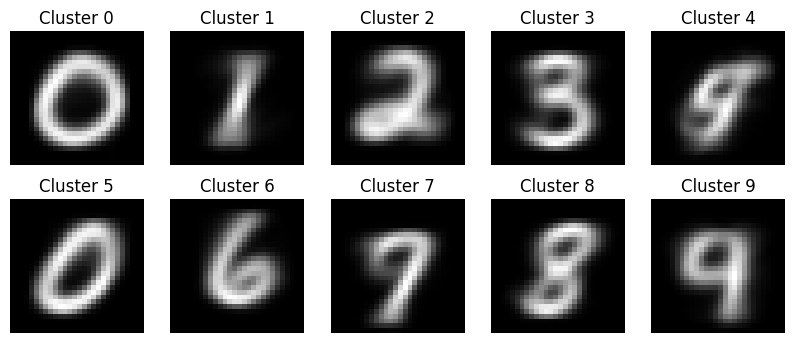

Homogeneity Score: 0.5183923519196172


In [ ]:
# Get cluster labels for each data point

# Visualize some cluster centers (optional)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
  ax.imshow(kmeans.centroids[i].reshape(28, 28), cmap='gray')
  ax.set_title(f"Cluster {i}")
  ax.axis('off')
plt.show()


# Evaluate the clustering (optional, example using homogeneity score)
from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(y, labels)
print(f"Homogeneity Score: {homogeneity}")

In [ ]:
from scipy.optimize import linear_sum_assignment

epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 100
epoch: 110
Clustering Accuracy: 0.5702
Accuracy: 0.5701666666666667 for number 0


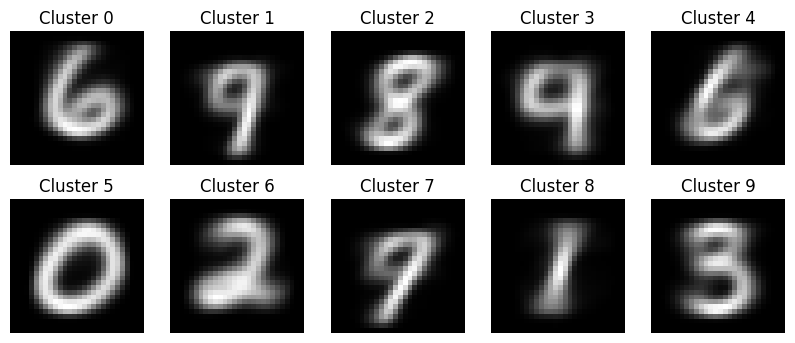

Homogeneity Score: 0.4965847875439654
epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 100
epoch: 110
Clustering Accuracy: 0.5773
Accuracy: 0.5772666666666667 for number 1


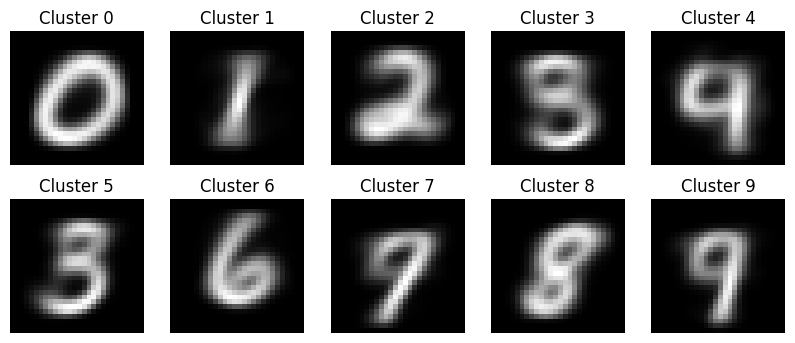

Homogeneity Score: 0.4915775504173539
epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
Clustering Accuracy: 0.5870
Accuracy: 0.5869666666666666 for number 4


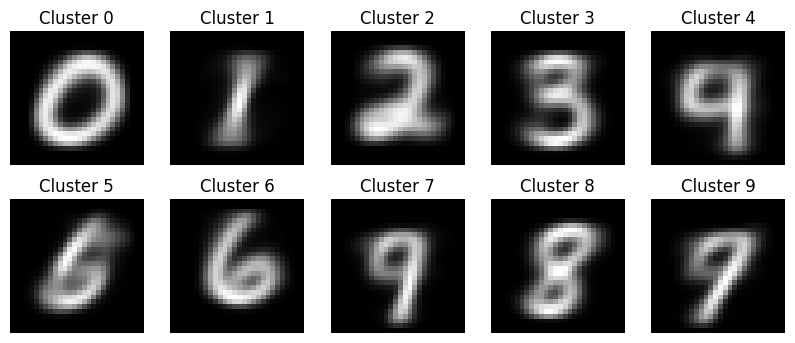

Homogeneity Score: 0.5019265820329941
epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
Clustering Accuracy: 0.6329
Accuracy: 0.6329 for number 23


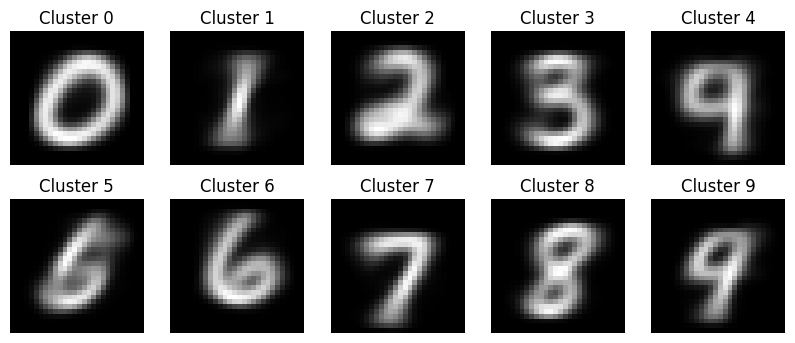

Homogeneity Score: 0.5399289925309585
epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
Clustering Accuracy: 0.6526
Accuracy: 0.6526333333333333 for number 114


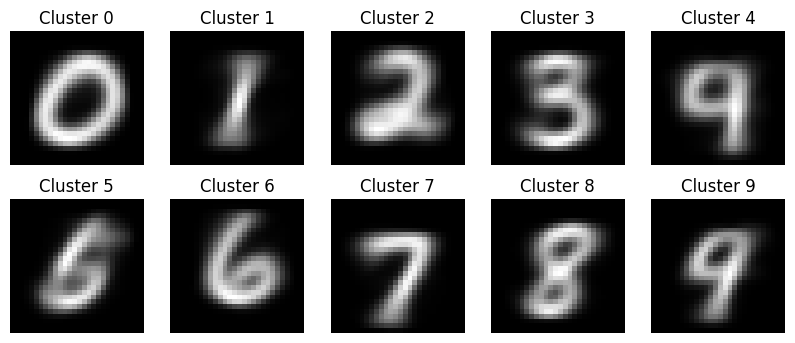

Homogeneity Score: 0.5547680598414151
epoch: 0
epoch: 10
epoch: 20
epoch: 30
Clustering Accuracy: 0.7417
Accuracy: 0.7417 for number 556


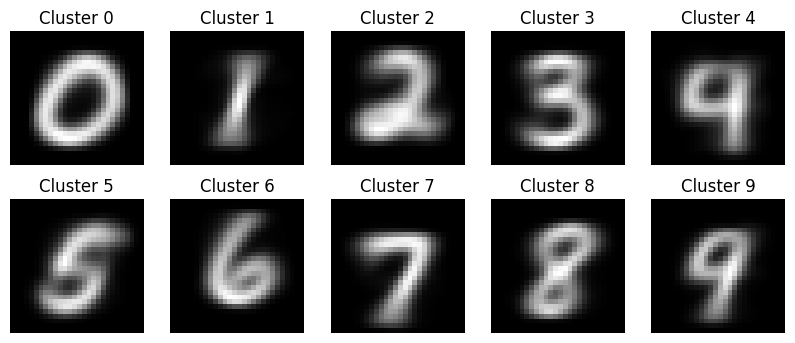

Homogeneity Score: 0.6190262957328224
epoch: 0
Clustering Accuracy: 0.9838
Accuracy: 0.9838 for number 2700


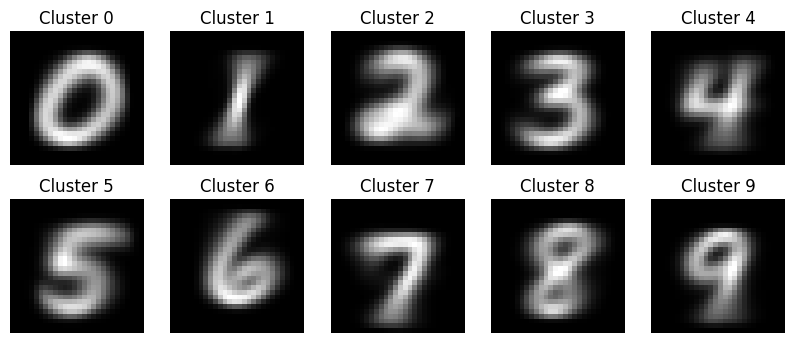

Homogeneity Score: 0.9536813297893648


In [ ]:
log_spaced_numbers = np.logspace(np.log10(1), np.log10(2700), num=6, base=10, dtype=int)
log_spaced_numbers = np.insert(log_spaced_numbers, 0, 0)
y_int = y.astype(int)

accuracies = []

for number in log_spaced_numbers:
  np.random.seed(0)
  # Initialize and fit the constrained k-means model
  if number == 0:
    hard_forced = None
  else:
    hard_forced = []
    for i in range(10):
      for j in range(number):
        hard_forced.append((index_list[i][j], i))

  kmeans = ConstrainedKMeans(X = X_scaled, n_clusters=10, max_iter = 300, must_link=None, cannot_link=None, hard_forced = hard_forced)
  kmeans.fit(X_scaled)

  labels = kmeans.labels
  # Assuming kmeans and y_int are defined
  num_clusters = len(np.unique(labels))
  num_classes = len(np.unique(y_int))

  # Build the cost matrix (maximize matches by minimizing negative matches)
  cost_matrix = np.zeros((num_clusters, num_classes))
  for i in range(num_clusters):
      for j in range(num_classes):
          cost_matrix[i, j] = -np.sum((labels == i) & (y_int == j))  # Negative matches for cost minimization

  # Solve the assignment problem
  row_ind, col_ind = linear_sum_assignment(cost_matrix)

  # Create the mapping from clusters to classes
  cluster_to_digit = {row_ind[i]: col_ind[i] for i in range(len(row_ind))}

  # Map predicted cluster labels to corresponding class labels
  predicted_labels = np.array([cluster_to_digit[label] for label in labels])

  # Calculate accuracy
  accuracy = np.mean(predicted_labels == y_int)
  print(f"Clustering Accuracy: {accuracy:.4f}")


  # Calculate the accuracy
  #accuracy = accuracy_score(y_int, labels)
  accuracies.append(accuracy)
  print(f"Accuracy: {accuracy} for number {number}")
  # Visualize some cluster centers (optional)
  fig, axs = plt.subplots(2, 5, figsize=(10, 4))
  for i, ax in enumerate(axs.flat):
    ax.imshow(kmeans.centroids[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')
  plt.show()


  # Evaluate the clustering (optional, example using homogeneity score)
  from sklearn.metrics import homogeneity_score
  homogeneity = homogeneity_score(y, labels)
  print(f"Homogeneity Score: {homogeneity}")


In [ ]:
plot_log_spaced_numbers = log_spaced_numbers/3000


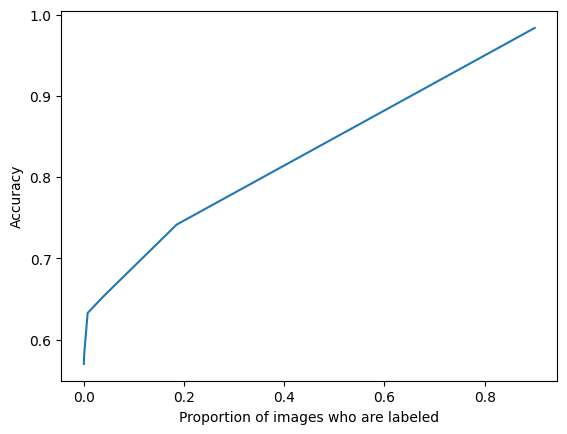

In [ ]:
import matplotlib.pyplot as plt
plt.plot(plot_log_spaced_numbers, accuracies)
plt.xlabel('Proportion of images who are labeled')
plt.ylabel('Accuracy')
plt.show()